In [1]:
import sklearn.feature_extraction.text as sk_text
from sklearn.decomposition import PCA
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np 
import json
import time
import csv

This function we wil use it for map each cluster to a specific class.

In [2]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C=metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping=list(np.argmax(C,axis=1))
    mapped_kmeans_labels =[mapping[l] for l in kmeans_labels]
    C2=metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

First we filter the business.json file and we keep a matrix with only the businesses that located in Torronto and 
have more than 10 reviews. 

Also we keep the true labels of businesses that we will use at next steps.

In [3]:
businesses = []
true_labels = []
categories=['Beauty & Spas','Shopping','Bars','All']
with open('yelp_academic_dataset_business.json',encoding='utf-8') as file_biz:
    for line in file_biz:
    	temp_biz = json.loads(line)
    	if temp_biz.get('city')=='Toronto' and temp_biz.get('review_count')>=10:
            counter=0
            indicator=0
            if temp_biz.get('categories') is not None:
                cat=temp_biz.get('categories').split(",")
            for x in cat:
                if x=="Beauty & Spas":
                    counter+=1
                    indicator=0
                if x=="Shopping":
                    counter+=1
                    indicator=1
                if x=="Bars":
                    counter+=1
                    indicator=2
            if counter!=0 and counter!=3:
                businesses.append(temp_biz.get('business_id'))
                true_labels.append(indicator)
            if counter==3:
                indicator=3
                businesses.append(temp_biz.get('business_id'))
                true_labels.append(indicator)

We create the reviews matrix that contains all the reviews for the businesses from above.

The reviews are sort exactly the same way as bussinesses wich means that the element review[ i ] refers to businesses[ i ].

In [4]:
reviews=[' '] * len(businesses)
with open('yelp_academic_dataset_review.json',encoding='utf-8') as file_rev:
    for line in file_rev:
        temp_rev = json.loads(line)
        if temp_rev.get('text') is not None and temp_rev.get('business_id') in businesses:
            pos=businesses.index(temp_rev.get('business_id'))
            reviews[pos]=reviews[pos]+temp_rev.get('text') 

We use the TfidfVectorizer function from sklearn package to crete the TF-IDF matrix.

In [5]:
vectorizer =sk_text.TfidfVectorizer(stop_words='english')
tfidf=vectorizer.fit_transform(reviews)

With K-means algorithm we create our clusters.

After that we will compute confusion matrix,precision and recall so as to check our clusters. 

[0.93269231 0.61330049 0.9707113 ]
[0.39917695 0.95402299 0.94693878]


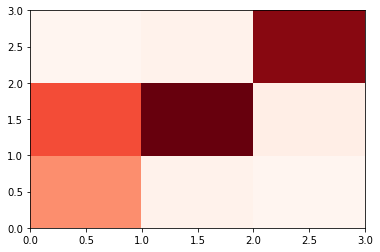

In [6]:
kmeans=sk_cluster.KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=1)
kmeans.fit_predict(tfidf)

C_kmeans=metrics.confusion_matrix(kmeans.labels_,true_labels)
mapped_kmeans_labels,C_kmeans =cluster_class_mapping(kmeans.labels_,true_labels)

precision_kmeans=metrics.precision_score(true_labels,mapped_kmeans_labels,average=None,zero_division=1)
print(precision_kmeans)

recall_kmeans=metrics.recall_score(true_labels,mapped_kmeans_labels,average=None)
print(recall_kmeans)

plt.pcolormesh(C_kmeans,cmap=plt.cm.Reds)
plt.show()

We can see from the confusion matrix that some businesses from Beauty & Spa are going to Shopping's cluster which means that may choose wrong number of clusters for the k-means algorithm.

We follow the same process as we did with K-means but now we use Agglomerative clustering with 4 different linkage types as you will see bellow.

First we have Complete linkage

[0.88931298 0.93886463 0.91860465]
[0.95884774 0.82375479 0.96734694]


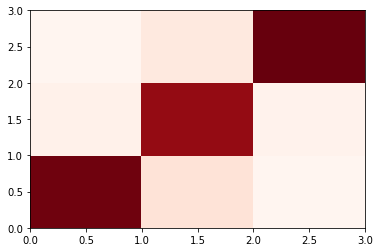

In [7]:
dense=tfidf.todense()

aggloC=sk_cluster.AgglomerativeClustering(linkage='complete',n_clusters=3)
agg_complete=aggloC.fit_predict(dense)

C_agglo_complete=metrics.confusion_matrix(agg_complete,true_labels)
mapped_aggloC_labels,C_agglo_complete = cluster_class_mapping(agg_complete,true_labels)

precision_aggloC=metrics.precision_score(true_labels,mapped_aggloC_labels,average=None,zero_division=1)
print(precision_aggloC)

recall_aggloC=metrics.recall_score(true_labels,mapped_aggloC_labels,average=None)
print(recall_aggloC)

plt.pcolormesh(C_agglo_complete,cmap=plt.cm.Reds)
plt.show()

Now its clear that agglomerative clustering with complete linkage has much better results from the kmeans algorithm beacause he have very good matching between the predicted and true labels. 



Here we have Single linkage

[1.         0.34846462 1.        ]
[0. 1. 0.]


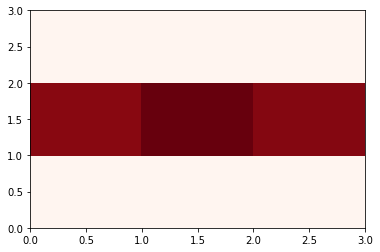

In [8]:
aggloS=sk_cluster.AgglomerativeClustering(linkage='single',n_clusters=3)
agg_single=aggloS.fit_predict(dense)

C_agglo_single=metrics.confusion_matrix(agg_single,true_labels)
mapped_aggloS_labels,C_agglo_single =cluster_class_mapping(agg_single,true_labels)

precision_aggloS=metrics.precision_score(true_labels,mapped_aggloS_labels,average=None,zero_division=1)
print(precision_aggloS)

recall_aggloS=metrics.recall_score(true_labels,mapped_aggloS_labels,average=None)
print(recall_aggloS)

plt.pcolormesh(C_agglo_single,cmap=plt.cm.Reds)
plt.show()

The single linkage doesnt give as very good results because a lot bussinesses from Beauty&Spa are going to Shopping's cluster and a lot of businesses from Bars also go to Shopping's cluster.

Here we have Average linkage

[1.         0.34893048 1.        ]
[0.00411523 1.         0.        ]


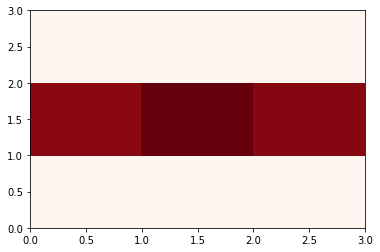

In [9]:
aggloA=sk_cluster.AgglomerativeClustering(linkage='average',n_clusters=3)
agg_average=aggloA.fit_predict(dense)

C_agglo_average=metrics.confusion_matrix(agg_average,true_labels)
mapped_aggloA_labels,C_agglo_average =cluster_class_mapping(agg_average,true_labels)

precision_aggloA=metrics.precision_score(true_labels,mapped_aggloA_labels,average=None,zero_division=1)
print(precision_aggloA)

recall_aggloA=metrics.recall_score(true_labels,mapped_aggloA_labels,average=None)
print(recall_aggloA)

plt.pcolormesh(C_agglo_average,cmap=plt.cm.Reds)
plt.show()

The Average linkage give as very similar results to single's linkage.

And here we have Ward linkage.

[0.97014925 0.569161   0.95850622]
[0.26748971 0.96168582 0.94285714]


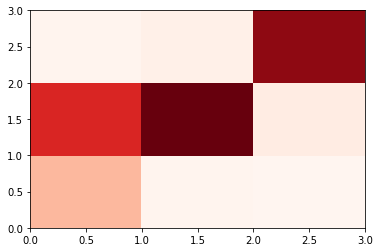

In [10]:
aggloW=sk_cluster.AgglomerativeClustering(linkage='ward',n_clusters=3)
agg_ward=aggloW.fit_predict(dense)

C_agglo_ward=metrics.confusion_matrix(agg_ward,true_labels)
mapped_aggloW_labels,C_agglo_ward =cluster_class_mapping(agg_ward,true_labels)

precision_aggloW=metrics.precision_score(true_labels,mapped_aggloW_labels,average=None,zero_division=1)
print(precision_aggloW)

recall_aggloW=metrics.recall_score(true_labels,mapped_aggloW_labels,average=None)
print(recall_aggloW)

plt.pcolormesh(C_agglo_ward,cmap=plt.cm.Reds)
plt.show()

Ward linkage results are very similar with kmeans results.

Now we will create and use the Silhouette plot  to check the best number of clusters we can use for the best result.

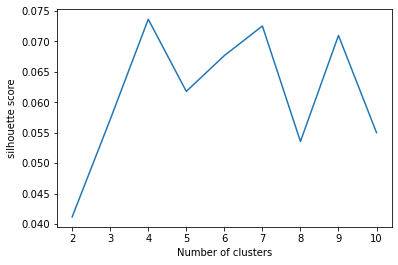

In [11]:
error=np.zeros(11)
sh_score=np.zeros(11)
for k in range(1,11):
    kmeans=sk_cluster.KMeans(init='k-means++',n_clusters=k,n_init=10)
    kmeans.fit_predict(tfidf)
    error[k]=kmeans.inertia_
    if k>1: sh_score[k]=metrics.silhouette_score(tfidf,kmeans.labels_)
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

We see a peek at k=7 and k=9 indicating that these may be good values for the cluster number.

So we will repeat the k-means but with more clusters

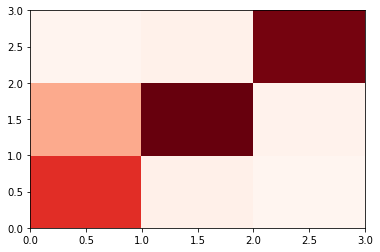

In [12]:
kmeans_5=sk_cluster.KMeans(n_clusters=5,init='k-means++',max_iter=100,n_init=1)
kmeans_5.fit_predict(tfidf)

C_kmeans_5=metrics.confusion_matrix(kmeans_5.labels_,true_labels)
mapped_kmeans_labels_5,C_kmeans_5 =cluster_class_mapping(kmeans_5.labels_,true_labels)
plt.pcolormesh(C_kmeans_5,cmap=plt.cm.Reds)
plt.show()

AS we can se theres no big deference 5 cluster from our first try with 3.

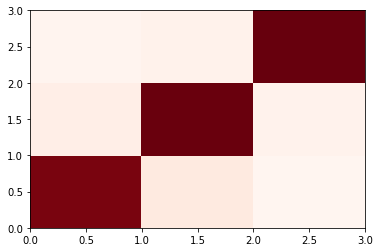

In [13]:
kmeans_8=sk_cluster.KMeans(n_clusters=9,init='k-means++',max_iter=100,n_init=1)
kmeans_8.fit_predict(tfidf)

C_kmeans_8=metrics.confusion_matrix(kmeans_8.labels_,true_labels)
mapped_kmeans_labels_8,C_kmeans_8 =cluster_class_mapping(kmeans_8.labels_,true_labels)
plt.pcolormesh(C_kmeans_8,cmap=plt.cm.Reds)
plt.show()

As we can see with 9 clusters the result is almost perfect with very few mistakes.